# Introduction to `neuprint-python`

---

**neuPrint** consists of a graph database fronted by an http server with a REST API.  The `neuprint-python` package is a small client library for interacting with that REST API.

This notebook demonstrates how to get started with `neuprint-python`.

### Install

The recommended way to install `neuprint-python` is via the `conda` package manager.  The package is distributed on the `flyem-forge` channel:

    $ conda install -c flyem-forge neuprint-python

### Client and Authorization Token

All communication with the `neuprint` server is done via a `Client` object.

To create a `Client`, you must provide two things:

- The neuprint server address (e.g. `emdata1.int.janelia.org:11000`)
- Your personal authentication token

To obtain your authorization token, follow these steps:

1. Navigate your web browser to the neuprint server address.
2. Log in.
3. Using the account menu in the upper right-hand corner, select "Auth Token" as shown in the screenshot below.
4. Copy the entire token

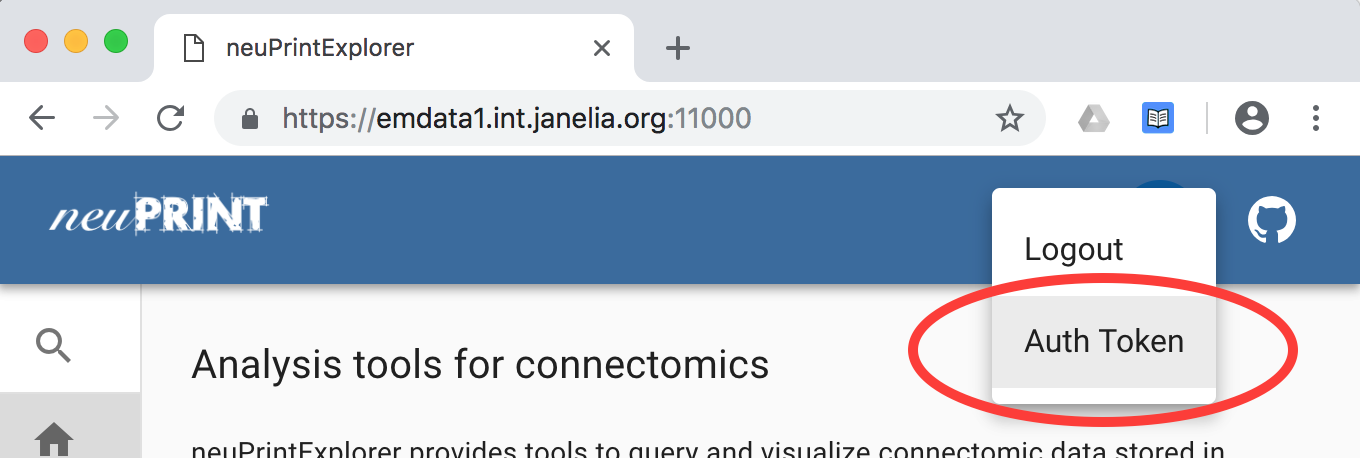

In [1]:
from IPython.display import Image
Image("img/token-screenshot.png", width=700)

---

To proceed with the examples in this notebook, please run the following cell and paste your token into the password box:

In [2]:
import getpass

SERVER = 'emdata1.int.janelia.org:11000'
TOKEN = getpass.getpass()

········


### Create the Client

In [3]:
from neuprint import Client

c = Client(SERVER, TOKEN)
c.fetch_version()

{'Version': '1.0'}

### Execute a query

Use the client to request data from neuprint.  The `fetch_custom()` method will run an arbitrary cypher query against the database.  For information about the neuprint data model, see the neuprint explorer web help:
https://emdata1.int.janelia.org:11000/help

In [4]:
## This query will return all neurons in the ROI ‘AB’
## that has greater than 10 pre-synaptic sites.
## Results are ordered by total synaptic sites (pre+post).
q = ("MATCH (n :`hemibrain-Neuron` {AB: true})"
     " WHERE n.pre > 10"
     " RETURN n.bodyId AS bodyId, n.name AS name, n.pre AS numpre, n.post AS numpost"
     " ORDER BY n.pre + n.post DESC")

results = c.fetch_custom(q)
print(f"Found {len(results)} results")
results.head()

Found 98 results


,bodyId,name,numpre,numpost
0,1513363614,LAL-NO3MP(aCCF)_R_ipsi,767,4769
1,1008378448,CRE/EB-FB_R_2,1027,3876
2,5813057274,None,1135,3717
3,513784136,CRE/SIP-FB(pMP)_R,1405,2356
4,483245369,FB-,1751,1967
